In [1]:
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore');


In [2]:
#read data into a dataframe; file was created above

df_fulldata = pd.read_csv("DataBase_WeatherRentalAmount_UTC.csv", index_col='FormattedDate')

## Linear Regression with multiple input features

In [3]:
#classic cross-validation test
x_train, x_test, y_train, y_test = train_test_split(df_fulldata[['Temperature','PrecipitationHeight','TotalCloudCover','MeanWindSpeed','Month','Weekday','Hour']], df_fulldata[['Rentals']], test_size=0.3)

In [4]:
def LinRegPipeline(x_train, y_train, x_test, y_test):
    """Training and Testing a Linear Regression model based on training and test set of x and y; Returning rsme and r2 of test set"""
    reg = linear_model.LinearRegression()
    reg.fit(x_train,y_train)
    y_pred_train = reg.predict(x_train)
    y_pred = reg.predict(x_test)
    
    
    #ns rounding prediction values
    np.ceil(y_pred,out=y_pred)
    np.ceil(y_pred_train, out=y_pred_train)
    
    rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r2_test = metrics.r2_score(y_test, y_pred)
    
    print("Training performance \n")
    print("RMSE: " + str(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))))
    print("R^2: " + str(metrics.r2_score(y_train, y_pred_train)))
    print("\n Test performance \n")
    print("RMSE: " + str(rmse_test))
    print("R^2: " + str(r2_test))
    return rmse_test, r2_test

In [5]:
LinRegPipeline(x_train, y_train, x_test, y_test)

Training performance 

RMSE: 57.28743388766183
R^2: 0.256342314821113

 Test performance 

RMSE: 58.686106367240896
R^2: 0.25010745759087116


(58.686106367240896, 0.25010745759087116)

In [6]:
#Linear Regression model with all parameters shows bad performance
#This is due to the fact, that not all parameters are actually linear.
#For comparison: Training one model with only linear parameters (temperature & precipitation).

#classic cross-validation testset
x_train_lin, x_test_lin, y_train_lin, y_test_lin = train_test_split(df_fulldata[['Temperature','PrecipitationHeight']], df_fulldata[['Rentals']], test_size=0.3)

LinRegPipeline (x_train_lin, y_train_lin, x_test_lin, y_test_lin)


Training performance 

RMSE: 58.43481640879555
R^2: 0.2341395547639663

 Test performance 

RMSE: 58.204084268476514
R^2: 0.24504562402164654


(58.204084268476514, 0.24504562402164654)

In [7]:
#Performance has not improved. Therefore linear models can be discarded. Also indication that these weather features are not sufficient to predict the bike rental behaviour.

## Polynomial Approach
### Model functions

In [8]:
def polynomialregression(deg, xtr, xte, ytr, yte):
    """Polynomial regression. Input: Regression degree, xtrain, xtest, ytrain, ytest. Returns r2_train, r2_test"""
    xtrain_array = np.array(xtr)
    xtest_array = np.array(xte)
    ytrain_array = np.array(ytr)
    ytest_array = np.array(yte)
    
    poly = PolynomialFeatures(degree = deg, include_bias=False)
    poly_xtrain = poly.fit_transform(xtrain_array)
    
    
    poly_model = linear_model.LinearRegression()
    poly_model.fit(poly_xtrain, ytrain_array)
    
    y_train_predicted = poly_model.predict(poly_xtrain)
    np.ceil(y_train_predicted,out=y_train_predicted)
    
    poly1 = PolynomialFeatures(degree = deg, include_bias=False)
    poly_xtest = poly1.fit_transform(xtest_array)
    y_test_predicted = poly_model.predict(poly_xtest)
    np.ceil(y_test_predicted,out=y_test_predicted)
    
    #evaluating train
    rmse_train = np.sqrt(metrics.mean_squared_error(ytrain_array, y_train_predicted))
    r2_train = metrics.r2_score(ytrain_array, y_train_predicted)
    
    # evaluating test
    rmse_test = np.sqrt(metrics.mean_squared_error(ytest_array, y_test_predicted))
    r2_test = metrics.r2_score(ytest_array, y_test_predicted)
    
    print("Testing the polynomial function of degree {}".format(deg))
    
    print("\n")
    
    print("The model performance for the training set")
    print("-------------------------------------------")
    print("RMSE of training set is {}".format(rmse_train))
    print("R2 score of training set is {}".format(r2_train))
    
    print("\n")
    
    print("The model performance for the test set")
    print("-------------------------------------------")
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_test))
    
    print("\n")
    print("\n")
    
    return rmse_train, rmse_test, r2_train, r2_test, poly_model

In [9]:
def polynomialregression_lasso(deg, reg_par, x_train_inp, x_test_inp, y_train_inp, y_test_inp):
    """Polynomial Regrisson with LASSO ragularization. Input: degree, regularization parameter, x_train, x_test, y_train, y_test. Returns rsme_test, r2_test and the model"""
    
    xtrain_array = np.array(x_train_inp)
    xtest_array = np.array(x_test_inp)
    ytrain_array = np.array(y_train_inp)
    ytest_array = np.array(y_test_inp)
    
    poly = PolynomialFeatures(degree = deg, include_bias=False)
    poly_xtrain = poly.fit_transform(xtrain_array)
    
    #Training the model
    poly_model_L1 = linear_model.Lasso(alpha = reg_par, normalize=False)
    poly_model_L1.fit(poly_xtrain, ytrain_array)
    
    y_train_predicted = poly_model_L1.predict(poly_xtrain)
    np.ceil(y_train_predicted,out=y_train_predicted)
    
    poly1 = PolynomialFeatures(degree = deg, include_bias=False)
    poly_xtest = poly1.fit_transform(xtest_array)
    y_test_predicted = poly_model_L1.predict(poly_xtest)
    np.ceil(y_test_predicted,out=y_test_predicted)
    
    #evaluating train
    rmse_train = np.sqrt(metrics.mean_squared_error(ytrain_array, y_train_predicted))
    r2_train = metrics.r2_score(ytrain_array, y_train_predicted)
    
    # evaluating test
    rmse_test = np.sqrt(metrics.mean_squared_error(ytest_array, y_test_predicted))
    r2_test = metrics.r2_score(ytest_array, y_test_predicted)
    
    print("Testing the polynomial function with LASSO regularization of degree {}".format(deg))
    
    print("\n")
    
    print("The model performance for the training set")
    print("-------------------------------------------")
    print("RMSE of training set is {}".format(rmse_train))
    print("R2 score of training set is {}".format(r2_train))
    
    print("\n")
    
    print("The model performance for the test set")
    print("-------------------------------------------")
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_test))
    
    print("\n")
    print("\n")
    #print("Rounded y_train_predicted is   ", y_train_predicted)
    #print ("Rounded y_test_predicted is   ", y_test_predicted)
    
    return rmse_train, rmse_test, r2_train, r2_test, poly_model_L1

### Creating a training (50 %), cross validation (20 %) and test (30 %) set for polynomial regression

In [10]:
#train, validation, test split

X = np.array([df_fulldata["Temperature"].values, np.ones(len(df_fulldata))]).T
np.random.seed(10)
perm = np.random.permutation(X.shape[0])
idx_train = perm[:int(len(perm)*0.5)]
idx_cv = perm[int(len(perm)*0.5):]

idx_test = idx_cv[:int(len(idx_cv)*0.6)]
idx_validation = idx_cv[int(len(idx_cv)*0.6):]

x_train, y_train = df_fulldata[['Temperature','PrecipitationHeight','TotalCloudCover','MeanWindSpeed','Month','Weekday','Hour']].iloc[idx_train].values, df_fulldata["Rentals"].iloc[idx_train].values
x_validation, y_validation = df_fulldata[['Temperature','PrecipitationHeight','TotalCloudCover','MeanWindSpeed','Month','Weekday','Hour']].iloc[idx_validation].values, df_fulldata["Rentals"].iloc[idx_validation].values
x_test, y_test = df_fulldata[['Temperature','PrecipitationHeight','TotalCloudCover','MeanWindSpeed','Month','Weekday','Hour']].iloc[idx_test].values, df_fulldata["Rentals"].iloc[idx_test].values


In [11]:
degr = [1,2,3,4,5]
rmse_train_lst = []
rmse_test_lst = []
r2_train_lst = []
r2_test_lst = []
model_lst = []

for d in degr:
    rmsetrain, rmsetest, r2train, r2test, model = polynomialregression(d, x_train, x_validation, y_train, y_validation)
    rmse_train_lst.append(rmsetrain)
    rmse_test_lst.append(rmsetest)
    r2_train_lst.append(r2train)
    r2_test_lst.append(r2test)
    model_lst.append(model)
    
    

Testing the polynomial function of degree 1


The model performance for the training set
-------------------------------------------
RMSE of training set is 56.31422310274919
R2 score of training set is 0.25666364329886127


The model performance for the test set
-------------------------------------------
RMSE of test set is 58.05137218431782
R2 score of test set is 0.2572630622061475




Testing the polynomial function of degree 2


The model performance for the training set
-------------------------------------------
RMSE of training set is 46.99393340168268
R2 score of training set is 0.48235410451550953


The model performance for the test set
-------------------------------------------
RMSE of test set is 48.74459875376965
R2 score of test set is 0.4763235513199423




Testing the polynomial function of degree 3


The model performance for the training set
-------------------------------------------
RMSE of training set is 44.85460882130776
R2 score of training set is 0.528411367

In [12]:
mpd = rmse_test_lst.index(min(rmse_test_lst))+1 #most performant degree

print("Best performance for model of degree " + str(mpd) + " with performance of root mean squared error " + str(min(rmse_test_lst)))

Best performance for model of degree 3 with performance of root mean squared error 47.198754517912626


In [13]:
#Performance of polynomial model
df_ppm = pd.DataFrame(list(zip(degr, rmse_train_lst, rmse_test_lst)), 
               columns =['Degree', 'Training Error', 'Validation Error'])

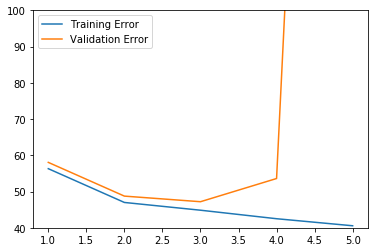

In [14]:
plt.plot(df_ppm['Degree'],df_ppm['Training Error'], label = 'Training Error')
plt.plot(df_ppm['Degree'],df_ppm['Validation Error'], label = 'Validation Error')
plt.ylim(40, 100)
plt.legend()

In [15]:
rmsetrain, rmsetest, r2train, r2test, model = polynomialregression(mpd, x_train, x_test, y_train, y_test)

Testing the polynomial function of degree 3


The model performance for the training set
-------------------------------------------
RMSE of training set is 44.85460882130776
R2 score of training set is 0.5284113678885913


The model performance for the test set
-------------------------------------------
RMSE of test set is 49.333064799771726
R2 score of test set is 0.4878192285265771






### LASSO regularization

In [16]:
degr = [1,2,3,4,5,6,7,8,9,10]
rmse_train_lst = []
rmse_val_lst = []
model_lst = []
r2_train_lst = []
r2_val_lst = []

for d in degr:
    rmsetrain, rmseval, r2train, r2test, mod = polynomialregression_lasso(d, 0.1, x_train, x_validation, y_train, y_validation)
    rmse_train_lst.append(rmsetrain)
    rmse_val_lst.append(rmseval)
    r2_train_lst.append(r2train)
    r2_val_lst.append(r2test)
    model_lst.append(mod)

Testing the polynomial function with LASSO regularization of degree 1


The model performance for the training set
-------------------------------------------
RMSE of training set is 56.31856919125444
R2 score of training set is 0.2565489038927403


The model performance for the test set
-------------------------------------------
RMSE of test set is 58.060612877751275
R2 score of test set is 0.25702658370965625




Testing the polynomial function with LASSO regularization of degree 2


The model performance for the training set
-------------------------------------------
RMSE of training set is 47.04150159993851
R2 score of training set is 0.4813056311067122


The model performance for the test set
-------------------------------------------
RMSE of test set is 48.708954704987775
R2 score of test set is 0.47708913867551506




Testing the polynomial function with LASSO regularization of degree 3


The model performance for the training set
-------------------------------------------
R

Best performance for model of degree 9 with performance of root mean squared error 44.869682428717034


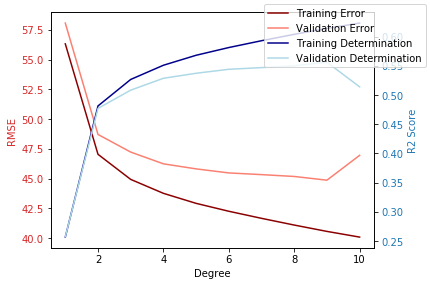

53.91489208110151 0.38826327031258245


In [17]:
mpd = rmse_val_lst.index(min(rmse_val_lst))+1 #most performant degree
best_model = model_lst[(mpd-1)]

print("Best performance for model of degree " + str(mpd) + " with performance of root mean squared error " + str(min(rmse_val_lst)))

#Performance of polynomial model
df_ppm = pd.DataFrame(list(zip(degr, rmse_train_lst, rmse_val_lst, r2_train_lst, r2_val_lst)), 
               columns =['Degree', 'Training Error', 'Validation Error', 'Training Determination', 'Validation Determination'])

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Degree')
ax1.set_ylabel('RMSE', color=color)
ax1.plot(df_ppm['Degree'],df_ppm['Training Error'], color='darkred', label= 'Training Error')
ax1.plot(df_ppm['Degree'],df_ppm['Validation Error'], color='salmon',label = 'Validation Error')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score', color=color)  # we already handled the x-label with ax1
ax2.plot(df_ppm['Degree'], df_ppm['Training Determination'], color='darkblue', label = 'Training Determination')
ax2.plot(df_ppm['Degree'], df_ppm['Validation Determination'], color='lightblue', label = 'Validation Determination')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend()
plt.show()

# evaluating on test
x_test_array = np.array(x_test)
poly = PolynomialFeatures(degree = mpd, include_bias=False)
poly_xtest = poly.fit_transform(x_test_array)

best_prediction = best_model.predict(poly_xtest)
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, best_prediction))
r2_test = metrics.r2_score(y_test, best_prediction)

print(rmse_test, r2_test)
#rmsetrain, rmsetest = polynomialregression(mpd, x_train, x_test, y_train, y_test)

In [18]:
#minmax scaler
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
#https://www.geeksforgeeks.org/data-normalization-in-data-mining/

normalized_df = df_fulldata
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(normalized_df))
MinMaxScaler()
print(scaler.data_max_) #Die maximalwerte werden angezeigt
print(scaler.transform(normalized_df))


MinMaxScaler(copy=True, feature_range=(0, 1))
[  38.1    8.    19.1   18.8   12.     6.    23.  2016.   478. ]
[[0.18543046 1.         0.         ... 1.         0.         0.00627615]
 [0.18543046 1.         0.         ... 0.         0.5        0.01882845]
 [0.18322296 1.         0.         ... 0.04347826 0.5        0.03138075]
 ...
 [0.0816777  1.         0.         ... 0.86956522 1.         0.02719665]
 [0.07726269 1.         0.         ... 0.91304348 1.         0.0209205 ]
 [0.07726269 1.         0.         ... 0.95652174 1.         0.01464435]]


## Prediction model for time frame aggregation

### 2h

In [19]:
df2 = pd.read_csv("DataBase_WeatherRentalAmount_2h_UTC.csv", index_col='grp')
df2.describe()

,Temperature,TotalCloudCover,PrecipitationHeight,MeanWindSpeed,Month,Weekday,Year,Rentals
count,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000
mean,11.376482,5.371295,0.123347,3.404195,6.519836,3.008037,2015.500570,139.292294
std,7.839789,2.546550,0.733339,2.085740,3.448657,1.969271,0.500085,128.885018
min,-7.050000,-1.000000,0.000000,0.000000,1.000000,0.000000,2014.500000,0.000000
25%,5.100000,3.500000,0.000000,1.850000,4.000000,1.000000,2015.000000,40.000000
50%,10.800000,6.500000,0.000000,2.900000,7.000000,3.000000,2016.000000,103.000000
75%,16.950000,7.000000,0.000000,4.500000,10.000000,5.000000,2016.000000,203.000000
max,37.950000,8.000000,32.500000,17.450000,12.000000,6.000000,2016.000000,792.000000


In [20]:
#Normalizing

normalized_df = df2
normalized_df['Temperature'] = np.divide(np.subtract(normalized_df['Temperature'],normalized_df['Temperature'].mean()),normalized_df['Temperature'].std())
normalized_df['Month'] = np.divide(np.subtract(normalized_df['Month'],normalized_df['Month'].mean()),normalized_df['Month'].std())
normalized_df['Weekday'] = np.divide(np.subtract(normalized_df['Weekday'],normalized_df['Weekday'].mean()),normalized_df['Weekday'].std())
normalized_df['Year'] = np.divide(np.subtract(normalized_df['Year'],normalized_df['Year'].mean()),normalized_df['Year'].std())
df2 = normalized_df

#classic cross-validation test
x_train2, x_test2, y_train2, y_test2 = train_test_split(df2[['Temperature','Month','Weekday','Year']], df2[['Rentals']], test_size=0.5)
x_validation2, x_test2, y_validation2, y_test2 = train_test_split(x_test2,y_test2,test_size=0.6)

In [21]:
degr = np.arange(1,15)
rmse_train_lst = []
rmse_val_lst = []
model_lst = []
r2_train_lst = []
r2_val_lst = []
# lists to store the results of the different models

for d in degr:
    rmsetrain, rmseval, r2train, r2test, mod = polynomialregression_lasso(d, 0.1, x_train2, x_validation2, y_train2, y_validation2)
    rmse_train_lst.append(rmsetrain)
    rmse_val_lst.append(rmseval)
    r2_train_lst.append(r2train)
    r2_val_lst.append(r2test)
    model_lst.append(mod)
    

Testing the polynomial function with LASSO regularization of degree 1


The model performance for the training set
-------------------------------------------
RMSE of training set is 108.2345728231879
R2 score of training set is 0.3188399118419899


The model performance for the test set
-------------------------------------------
RMSE of test set is 103.34983377534338
R2 score of test set is 0.3703779288766129




Testing the polynomial function with LASSO regularization of degree 2


The model performance for the training set
-------------------------------------------
RMSE of training set is 100.42300070087252
R2 score of training set is 0.4136140355738688


The model performance for the test set
-------------------------------------------
RMSE of test set is 95.33058665803732
R2 score of test set is 0.46429597431561387




Testing the polynomial function with LASSO regularization of degree 3


The model performance for the training set
-------------------------------------------
RM

Best performance for model of degree 5 with performance of root mean squared error 91.91630531946107


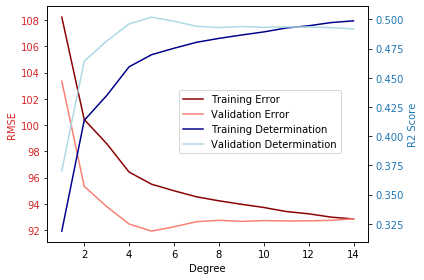

92.45852908800742 0.4442911631052552


In [22]:
mpd = rmse_val_lst.index(min(rmse_val_lst))+1 #most performant degree
best_model = model_lst[(mpd-1)]

print("Best performance for model of degree " + str(mpd) + " with performance of root mean squared error " + str(min(rmse_val_lst)))

#Performance of polynomial model
df_ppm = pd.DataFrame(list(zip(degr, rmse_train_lst, rmse_val_lst, r2_train_lst, r2_val_lst)), 
               columns =['Degree', 'Training Error', 'Validation Error', 'Training Determination', 'Validation Determination'])


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Degree')
ax1.set_ylabel('RMSE', color=color)
ax1.plot(df_ppm['Degree'],df_ppm['Training Error'], color='darkred', label= 'Training Error')
ax1.plot(df_ppm['Degree'],df_ppm['Validation Error'], color='salmon',label = 'Validation Error')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score', color=color)  # we already handled the x-label with ax1
ax2.plot(df_ppm['Degree'], df_ppm['Training Determination'], color='darkblue', label = 'Training Determination')
ax2.plot(df_ppm['Degree'], df_ppm['Validation Determination'], color='lightblue', label = 'Validation Determination')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend(loc='center right', bbox_to_anchor=(0,0,0.8,1.1))
plt.show()

# evaluating on test
x_test_array = np.array(x_test2)
poly = PolynomialFeatures(degree = mpd, include_bias=False)
poly_xtest = poly.fit_transform(x_test_array)

best_prediction = best_model.predict(poly_xtest)
rmse_test = np.sqrt(metrics.mean_squared_error(y_test2, best_prediction))
r2_test = metrics.r2_score(y_test2, best_prediction)

print(rmse_test, r2_test)
#rmsetrain, rmsetest = polynomialregression(mpd, x_train, x_test, y_train, y_test)

### 6h

In [23]:
df6 = pd.read_csv("DataBase_WeatherRentalAmount_6h_UTC.csv", index_col='grp')
df6.describe()

,Temperature,TotalCloudCover,PrecipitationHeight,MeanWindSpeed,Month,Weekday,Year,Rentals
count,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000
mean,11.376482,5.371295,0.370041,3.404195,6.519836,3.008037,2015.500570,417.876881
std,7.720378,2.370696,1.490533,1.976931,3.448323,1.948290,0.500104,343.441629
min,-6.150000,-1.000000,0.000000,0.200000,1.000000,0.000000,2014.833333,0.000000
25%,5.133333,3.666667,0.000000,1.933333,4.000000,1.000000,2015.000000,132.750000
50%,10.850000,6.166667,0.000000,2.883333,7.000000,3.000000,2016.000000,345.000000
75%,16.916667,7.166667,0.000000,4.433333,10.000000,5.000000,2016.000000,599.000000
max,36.433333,8.000000,38.100000,15.883333,12.000000,6.000000,2016.000000,1706.000000


In [24]:
#Normalizing

normalized_df = df6
normalized_df['Temperature'] = np.divide(np.subtract(normalized_df['Temperature'],normalized_df['Temperature'].mean()),normalized_df['Temperature'].std())
normalized_df['Month'] = np.divide(np.subtract(normalized_df['Month'],normalized_df['Month'].mean()),normalized_df['Month'].std())
normalized_df['Weekday'] = np.divide(np.subtract(normalized_df['Weekday'],normalized_df['Weekday'].mean()),normalized_df['Weekday'].std())
normalized_df['Year'] = np.divide(np.subtract(normalized_df['Year'],normalized_df['Year'].mean()),normalized_df['Year'].std())
df6 = normalized_df

#classic cross-validation test
x_train6, x_test6, y_train6, y_test6 = train_test_split(df6[['Temperature','Month','Weekday','Year']], df6[['Rentals']], test_size=0.5)
x_validation6, x_test6, y_validation6, y_test6 = train_test_split(x_test6,y_test6,test_size=0.6)

In [25]:
degr = np.arange(1,15)
rmse_train_lst = []
rmse_val_lst = []
model_lst = []
r2_train_lst = []
r2_val_lst = []
# lists to store the results of the different models

for d in degr:
    rmsetrain, rmseval, r2train, r2test, mod = polynomialregression_lasso(d, 0.1, x_train6, x_validation6, y_train6, y_validation6)
    rmse_train_lst.append(rmsetrain)
    rmse_val_lst.append(rmseval)
    r2_train_lst.append(r2train)
    r2_val_lst.append(r2test)
    model_lst.append(mod)
    

Testing the polynomial function with LASSO regularization of degree 1


The model performance for the training set
-------------------------------------------
RMSE of training set is 256.2976464662353
R2 score of training set is 0.43459164561875196


The model performance for the test set
-------------------------------------------
RMSE of test set is 263.7337964898676
R2 score of test set is 0.36772916277111667




Testing the polynomial function with LASSO regularization of degree 2


The model performance for the training set
-------------------------------------------
RMSE of training set is 230.05322943200127
R2 score of training set is 0.5444567107625624


The model performance for the test set
-------------------------------------------
RMSE of test set is 245.2427368955093
R2 score of test set is 0.4532813536120742




Testing the polynomial function with LASSO regularization of degree 3


The model performance for the training set
-------------------------------------------
RM

Best performance for model of degree 5 with performance of root mean squared error 238.17953255061065


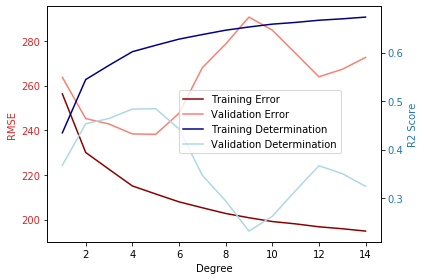

246.70644013775026 0.5166765474645234


In [26]:
mpd = rmse_val_lst.index(min(rmse_val_lst))+1 #most performant degree
best_model = model_lst[(mpd-1)]

print("Best performance for model of degree " + str(mpd) + " with performance of root mean squared error " + str(min(rmse_val_lst)))

#Performance of polynomial model
df_ppm = pd.DataFrame(list(zip(degr, rmse_train_lst, rmse_val_lst, r2_train_lst, r2_val_lst)), 
               columns =['Degree', 'Training Error', 'Validation Error', 'Training Determination', 'Validation Determination'])


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Degree')
ax1.set_ylabel('RMSE', color=color)
ax1.plot(df_ppm['Degree'],df_ppm['Training Error'], color='darkred', label= 'Training Error')
ax1.plot(df_ppm['Degree'],df_ppm['Validation Error'], color='salmon',label = 'Validation Error')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score', color=color)  # we already handled the x-label with ax1
ax2.plot(df_ppm['Degree'], df_ppm['Training Determination'], color='darkblue', label = 'Training Determination')
ax2.plot(df_ppm['Degree'], df_ppm['Validation Determination'], color='lightblue', label = 'Validation Determination')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend(loc='center right', bbox_to_anchor=(0,0,0.8,1.1))
plt.show()

# evaluating on test
x_test_array = np.array(x_test6)
poly = PolynomialFeatures(degree = mpd, include_bias=False)
poly_xtest = poly.fit_transform(x_test_array)

best_prediction = best_model.predict(poly_xtest)
rmse_test = np.sqrt(metrics.mean_squared_error(y_test6, best_prediction))
r2_test = metrics.r2_score(y_test6, best_prediction)

print(rmse_test, r2_test)

### 24h

In [27]:
df24 = pd.read_csv("DataBase_WeatherRentalAmount_24h_UTC.csv", index_col='grp')
df24.describe()

,Temperature,TotalCloudCover,PrecipitationHeight,MeanWindSpeed,Month,Weekday,Year,Rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,11.376482,5.371295,1.480164,3.404195,6.519836,3.008037,2015.500570,1671.507524
std,7.247375,1.958596,3.556072,1.635631,3.449820,1.941275,0.500347,915.966595
min,-5.683333,0.000000,0.000000,1.058333,1.000000,0.250000,2014.958333,0.000000
25%,5.318750,4.208333,0.000000,2.227083,3.979167,0.958333,2015.000000,958.000000
50%,10.941667,5.916667,0.000000,3.033333,7.000000,2.958333,2015.958333,1546.000000
75%,17.004167,6.875000,1.100000,4.135417,9.958333,4.958333,2016.000000,2065.500000
max,29.925000,8.000000,44.700000,10.650000,12.000000,5.958333,2016.000000,4401.000000


In [28]:
#Normalizing

normalized_df = df24
normalized_df['Temperature'] = np.divide(np.subtract(normalized_df['Temperature'],normalized_df['Temperature'].mean()),normalized_df['Temperature'].std())
normalized_df['Month'] = np.divide(np.subtract(normalized_df['Month'],normalized_df['Month'].mean()),normalized_df['Month'].std())
normalized_df['Weekday'] = np.divide(np.subtract(normalized_df['Weekday'],normalized_df['Weekday'].mean()),normalized_df['Weekday'].std())
normalized_df['Year'] = np.divide(np.subtract(normalized_df['Year'],normalized_df['Year'].mean()),normalized_df['Year'].std())
df24 = normalized_df

#classic cross-validation test
x_train24, x_test24, y_train24, y_test24 = train_test_split(df24[['Temperature','Month','Weekday','Year']], df24[['Rentals']], test_size=0.5)
x_validation24, x_test24, y_validation24, y_test24 = train_test_split(x_test24,y_test24,test_size=0.6)

In [29]:
degr = np.arange(1,15)
rmse_train_lst = []
rmse_val_lst = []
model_lst = []
r2_train_lst = []
r2_val_lst = []
# lists to store the results of the different models

for d in degr:
    rmsetrain, rmseval, r2train, r2test, mod = polynomialregression_lasso(d, 0.1, x_train24, x_validation24, y_train24, y_validation24)
    rmse_train_lst.append(rmsetrain)
    rmse_val_lst.append(rmseval)
    r2_train_lst.append(r2train)
    r2_val_lst.append(r2test)
    model_lst.append(mod)
    

Testing the polynomial function with LASSO regularization of degree 1


The model performance for the training set
-------------------------------------------
RMSE of training set is 580.7182774876464
R2 score of training set is 0.6175595867037871


The model performance for the test set
-------------------------------------------
RMSE of test set is 585.1452928107942
R2 score of test set is 0.5861273750341939




Testing the polynomial function with LASSO regularization of degree 2


The model performance for the training set
-------------------------------------------
RMSE of training set is 394.70918720718095
R2 score of training set is 0.8233200536723567


The model performance for the test set
-------------------------------------------
RMSE of test set is 421.0341882451268
R2 score of test set is 0.7857237710383229




Testing the polynomial function with LASSO regularization of degree 3


The model performance for the training set
-------------------------------------------
RMSE

Best performance for model of degree 4 with performance of root mean squared error 361.71638022907865


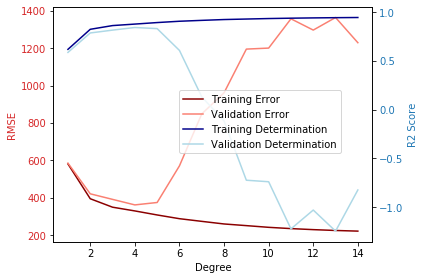

381.6372791951975 0.810057412227084


In [30]:
mpd = rmse_val_lst.index(min(rmse_val_lst))+1 #most performant degree
best_model = model_lst[(mpd-1)]

print("Best performance for model of degree " + str(mpd) + " with performance of root mean squared error " + str(min(rmse_val_lst)))

#Performance of polynomial model
df_ppm = pd.DataFrame(list(zip(degr, rmse_train_lst, rmse_val_lst, r2_train_lst, r2_val_lst)), 
               columns =['Degree', 'Training Error', 'Validation Error', 'Training Determination', 'Validation Determination'])


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Degree')
ax1.set_ylabel('RMSE', color=color)
ax1.plot(df_ppm['Degree'],df_ppm['Training Error'], color='darkred', label= 'Training Error')
ax1.plot(df_ppm['Degree'],df_ppm['Validation Error'], color='salmon',label = 'Validation Error')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score', color=color)  # we already handled the x-label with ax1
ax2.plot(df_ppm['Degree'], df_ppm['Training Determination'], color='darkblue', label = 'Training Determination')
ax2.plot(df_ppm['Degree'], df_ppm['Validation Determination'], color='lightblue', label = 'Validation Determination')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend(loc='center right', bbox_to_anchor=(0,0,0.8,1.1))
plt.show()

# evaluating on test
x_test_array = np.array(x_test24)
poly = PolynomialFeatures(degree = mpd, include_bias=False)
poly_xtest = poly.fit_transform(x_test_array)

best_prediction = best_model.predict(poly_xtest)
rmse_test = np.sqrt(metrics.mean_squared_error(y_test24, best_prediction))
r2_test = metrics.r2_score(y_test24, best_prediction)

print(rmse_test, r2_test)

## Slimmed feature set

In [31]:
df_slim = df_fulldata[['Temperature','Month','Weekday','Hour','Year','Rentals']]

In [32]:
"""ns Normalizing the initial dataframe for later regression"""



'ns Normalizing the initial dataframe for later regression'

In [33]:
cv_option1 = True # two different ways of train, validation, test splitting to be determined by variable
normalize_data = False

if normalize_data:
    normalized_df = df_slim
    normalized_df['Temperature'] = np.divide(np.subtract(normalized_df['Temperature'],normalized_df['Temperature'].mean()),normalized_df['Temperature'].std())
    normalized_df['Month'] = np.divide(np.subtract(normalized_df['Month'],normalized_df['Month'].mean()),normalized_df['Month'].std())
    normalized_df['Weekday'] = np.divide(np.subtract(normalized_df['Weekday'],normalized_df['Weekday'].mean()),normalized_df['Weekday'].std())
    normalized_df['Hour'] = np.divide(np.subtract(normalized_df['Hour'],normalized_df['Hour'].mean()),normalized_df['Hour'].std())
    normalized_df['Year'] = np.divide(np.subtract(normalized_df['Year'],normalized_df['Year'].mean()),normalized_df['Year'].std())


if cv_option1 :
    X = np.array([df_slim['Temperature'].values, np.ones(len(df_slim))]).T
    np.random.seed(10)
    perm = np.random.permutation(X.shape[0])
    idx_train = perm[:int(len(perm)*0.5)]
    idx_cv = perm[int(len(perm)*0.5):]

    idx_test = idx_cv[:int(len(idx_cv)*0.6)]
    idx_validation = idx_cv[int(len(idx_cv)*0.6):]

    x_train, y_train = df_slim[['Temperature','Month','Weekday','Hour','Year']].iloc[idx_train].values, df_slim["Rentals"].iloc[idx_train].values
    x_validation, y_validation = df_slim[['Temperature','Month','Weekday','Hour','Year']].iloc[idx_validation].values, df_slim["Rentals"].iloc[idx_validation].values
    x_test, y_test = df_slim[['Temperature','Month','Weekday','Hour','Year']].iloc[idx_test].values, df_slim["Rentals"].iloc[idx_test].values
    
else:
    x_train, x_holdout, y_train, y_holdout = train_test_split(df_slim[['Temperature','Month','Weekday','Hour','Year']], df_slim[['Rentals']], test_size=0.3)
    x_validation, x_test, y_validation, y_test = train_test_split(x_holdout, y_holdout, test_size=0.6)



In [34]:
degr = np.arange(1,19,1)
rmse_train_lst = []
rmse_val_lst = []
model_lst = []
r2_train_lst = []
r2_val_lst = []
# lists to store the results of the different models

for d in degr:
    rmsetrain, rmseval, r2train, r2test, mod = polynomialregression_lasso(d, 0.1, x_train, x_validation, y_train, y_validation)
    rmse_train_lst.append(rmsetrain)
    rmse_val_lst.append(rmseval)
    r2_train_lst.append(r2train)
    r2_val_lst.append(r2test)
    model_lst.append(mod)

Testing the polynomial function with LASSO regularization of degree 1


The model performance for the training set
-------------------------------------------
RMSE of training set is 53.573505551121286
R2 score of training set is 0.32725680906655885


The model performance for the test set
-------------------------------------------
RMSE of test set is 55.3810371530459
R2 score of test set is 0.3240225434128031




Testing the polynomial function with LASSO regularization of degree 2


The model performance for the training set
-------------------------------------------
RMSE of training set is 44.71626743863368
R2 score of training set is 0.5313158460504763


The model performance for the test set
-------------------------------------------
RMSE of test set is 46.040096764850986
R2 score of test set is 0.5328218756890755




Testing the polynomial function with LASSO regularization of degree 3


The model performance for the training set
-------------------------------------------
RMS

Best performance for model of degree 18 with performance of root mean squared error 40.171745854571405


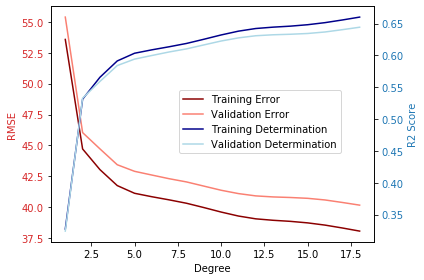

42.66229462305883 0.6169676122961814


In [35]:
mpd = rmse_val_lst.index(min(rmse_val_lst))+1 #most performant degree
best_model = model_lst[(mpd-1)]

print("Best performance for model of degree " + str(mpd) + " with performance of root mean squared error " + str(min(rmse_val_lst)))

#Performance of polynomial model
df_ppm = pd.DataFrame(list(zip(degr, rmse_train_lst, rmse_val_lst, r2_train_lst, r2_val_lst)), 
               columns =['Degree', 'Training Error', 'Validation Error', 'Training Determination', 'Validation Determination'])


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Degree')
ax1.set_ylabel('RMSE', color=color)
ax1.plot(df_ppm['Degree'],df_ppm['Training Error'], color='darkred', label= 'Training Error')
ax1.plot(df_ppm['Degree'],df_ppm['Validation Error'], color='salmon',label = 'Validation Error')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score', color=color)  # we already handled the x-label with ax1
ax2.plot(df_ppm['Degree'], df_ppm['Training Determination'], color='darkblue', label = 'Training Determination')
ax2.plot(df_ppm['Degree'], df_ppm['Validation Determination'], color='lightblue', label = 'Validation Determination')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend(loc='center right', bbox_to_anchor=(0,0,0.8,1.1))
plt.show()

# evaluating on test
x_test_array = np.array(x_test)
poly = PolynomialFeatures(degree = mpd, include_bias=False)
poly_xtest = poly.fit_transform(x_test_array)

best_prediction = best_model.predict(poly_xtest)
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, best_prediction))
r2_test = metrics.r2_score(y_test, best_prediction)

print(rmse_test, r2_test)
#rmsetrain, rmsetest = polynomialregression(mpd, x_train, x_test, y_train, y_test)

In [36]:
df_slim = df_fulldata[['Temperature','Month','Weekday','Hour','Year','Rentals']]
cv_option1 = True # two different ways of train, validation, test splitting to be determined by variable
normalize_data = True

if normalize_data:
    normalized_df = df_slim
    normalized_df['Temperature'] = np.divide(np.subtract(normalized_df['Temperature'],normalized_df['Temperature'].mean()),normalized_df['Temperature'].std())
    normalized_df['Month'] = np.divide(np.subtract(normalized_df['Month'],normalized_df['Month'].mean()),normalized_df['Month'].std())
    normalized_df['Weekday'] = np.divide(np.subtract(normalized_df['Weekday'],normalized_df['Weekday'].mean()),normalized_df['Weekday'].std())
    normalized_df['Hour'] = np.divide(np.subtract(normalized_df['Hour'],normalized_df['Hour'].mean()),normalized_df['Hour'].std())
    normalized_df['Year'] = np.divide(np.subtract(normalized_df['Year'],normalized_df['Year'].mean()),normalized_df['Year'].std())
    
    df_slim = normalized_df

if cv_option1 :
    X = np.array([df_slim['Temperature'].values, np.ones(len(df_slim))]).T
    np.random.seed(10)
    perm = np.random.permutation(X.shape[0])
    idx_train = perm[:int(len(perm)*0.5)]
    idx_cv = perm[int(len(perm)*0.5):]

    idx_test = idx_cv[:int(len(idx_cv)*0.6)]
    idx_validation = idx_cv[int(len(idx_cv)*0.6):]

    x_train, y_train = df_slim[['Temperature','Month','Weekday','Hour','Year']].iloc[idx_train].values, df_slim["Rentals"].iloc[idx_train].values
    x_validation, y_validation = df_slim[['Temperature','Month','Weekday','Hour','Year']].iloc[idx_validation].values, df_slim["Rentals"].iloc[idx_validation].values
    x_test, y_test = df_slim[['Temperature','Month','Weekday','Hour','Year']].iloc[idx_test].values, df_slim["Rentals"].iloc[idx_test].values
    
else:
    x_train, x_holdout, y_train, y_holdout = train_test_split(df_slim[['Temperature','Month','Weekday','Hour','Year']], df_slim[['Rentals']], test_size=0.3)
    x_validation, x_test, y_validation, y_test = train_test_split(x_holdout, y_holdout, test_size=0.6)



In [37]:
degr = np.arange(1,16,1)
rmse_train_lst = []
rmse_val_lst = []
model_lst = []
r2_train_lst = []
r2_val_lst = []

for d in degr:
    rmsetrain, rmseval, r2train, r2test, mod = polynomialregression_lasso(d, 0.1, x_train, x_validation, y_train, y_validation)
    rmse_train_lst.append(rmsetrain)
    rmse_val_lst.append(rmseval)
    r2_train_lst.append(r2train)
    r2_val_lst.append(r2test)
    model_lst.append(mod)

Testing the polynomial function with LASSO regularization of degree 1


The model performance for the training set
-------------------------------------------
RMSE of training set is 53.56995609554325
R2 score of training set is 0.3273459498813748


The model performance for the test set
-------------------------------------------
RMSE of test set is 55.380167500722614
R2 score of test set is 0.3240437730892477




Testing the polynomial function with LASSO regularization of degree 2


The model performance for the training set
-------------------------------------------
RMSE of training set is 42.94736648724453
R2 score of training set is 0.5676631468960134


The model performance for the test set
-------------------------------------------
RMSE of test set is 44.09798605260445
R2 score of test set is 0.5714045514782183




Testing the polynomial function with LASSO regularization of degree 3


The model performance for the training set
-------------------------------------------
RMSE

Best performance for model of degree 12 with performance of root mean squared error 33.80711552515375


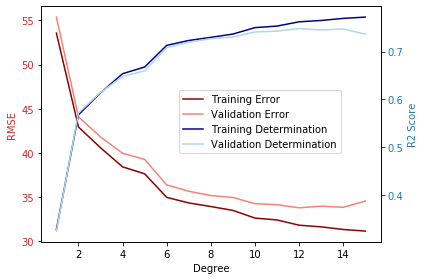

36.06166897539057 0.7263227346902432


In [38]:
mpd = rmse_val_lst.index(min(rmse_val_lst))+1 #most performant degree
best_model = model_lst[(mpd-1)]

print("Best performance for model of degree " + str(mpd) + " with performance of root mean squared error " + str(min(rmse_val_lst)))

#Performance of polynomial model
df_ppm = pd.DataFrame(list(zip(degr, rmse_train_lst, rmse_val_lst, r2_train_lst, r2_val_lst)), 
               columns =['Degree', 'Training Error', 'Validation Error', 'Training Determination', 'Validation Determination'])

#plotting the performance on train and validation
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Degree')
ax1.set_ylabel('RMSE', color=color)
ax1.plot(df_ppm['Degree'],df_ppm['Training Error'], color='darkred', label= 'Training Error')
ax1.plot(df_ppm['Degree'],df_ppm['Validation Error'], color='salmon',label = 'Validation Error')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score', color=color)  # we already handled the x-label with ax1
ax2.plot(df_ppm['Degree'], df_ppm['Training Determination'], color='darkblue', label = 'Training Determination')
ax2.plot(df_ppm['Degree'], df_ppm['Validation Determination'], color='lightblue', label = 'Validation Determination')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend(loc='center right', bbox_to_anchor=(0,0,0.8,1.1))
plt.show()

# evaluating on test
x_test_array = np.array(x_test)
poly = PolynomialFeatures(degree = mpd, include_bias=False)
poly_xtest = poly.fit_transform(x_test_array)

best_prediction = best_model.predict(poly_xtest)
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, best_prediction))
r2_test = metrics.r2_score(y_test, best_prediction)

print(rmse_test, r2_test)
#rmsetrain, rmsetest = polynomialregression(mpd, x_train, x_test, y_train, y_test)